# Gradient Boosting Classification — Advanced Theory & Interview Q&A

## Advanced Theory

- **Boosting:** Sequentially combines weak learners, each correcting previous errors.
- **Gradient Descent:** Fits new models to the negative gradient of the loss function.
- **Learning Rate:** Controls contribution of each weak learner; lower values slow learning, reduce overfitting.
- **Subsampling:** Stochastic gradient boosting uses random subsamples for diversity.
- **Regularization:** Limit tree depth, use subsampling, early stopping to prevent overfitting.
- **Extensions:** Gradient Boosting Regression, XGBoost, LightGBM, CatBoost.
- **Diagnostics:** Confusion matrix, ROC-AUC, precision-recall curves, feature importance plots.
- **Limitations:** Prone to overfitting, slower to train, many hyperparameters.

## Advanced Interview Q&A

**Q1: How does Gradient Boosting improve accuracy?**  
A: By sequentially correcting errors of previous models using gradient descent.

**Q2: What is the role of learning rate in Gradient Boosting?**  
A: Controls contribution of each weak learner; lower values slow learning, reduce overfitting.

**Q3: How do you prevent overfitting in Gradient Boosting?**  
A: Use early stopping, limit tree depth, use subsampling.

**Q4: What is the difference between Gradient Boosting and AdaBoost?**  
A: Gradient Boosting uses arbitrary differentiable loss, AdaBoost uses exponential loss.

**Q5: How do you assess model fit?**  
A: Use accuracy, ROC-AUC, precision-recall curves, confusion matrix.

**Q6: What are the limitations of Gradient Boosting?**  
A: Prone to overfitting, slower to train, many hyperparameters.

**Q7: How do you tune hyperparameters in Gradient Boosting?**  
A: Use grid search, cross-validation for n_estimators, learning_rate, max_depth.

**Q8: What is the bias-variance tradeoff in Gradient Boosting?**  
A: Boosting reduces bias, but can increase variance if overfitting.

**Q9: What is the impact of weak learner choice?**  
A: Stronger learners can overfit; decision stumps are common.

**Q10: What are LightGBM and CatBoost?**  
A: Advanced gradient boosting libraries optimized for speed and accuracy.

# Gradient Boosting Classification — Theory & Interview Q&A

Gradient Boosting Classification is an ensemble learning method that builds models sequentially, each correcting the errors of the previous, using decision trees as weak learners.

| Aspect                | Details                                                                 |
|-----------------------|------------------------------------------------------------------------|
| **Definition**        | Sequentially builds models to minimize errors, using decision trees.     |
| **Equation**          | Combines weak learners by minimizing loss function                      |
| **Use Cases**         | Credit scoring, disease prediction, text classification                 |
| **Assumptions**       | Weak learners perform slightly better than random guessing              |
| **Pros**              | High accuracy, handles mixed data, flexible loss functions              |
| **Cons**              | Prone to overfitting, slower to train                                   |
| **Key Parameters**    | n_estimators, learning_rate, max_depth, subsample                      |
| **Evaluation Metrics**| Accuracy, Precision, Recall, F1-score                                   |

## Interview Q&A

**Q1: What is Gradient Boosting?**  
A: An ensemble method that builds models sequentially, each correcting previous errors.

**Q2: How does Gradient Boosting work?**  
A: It fits new models to the residuals of previous models.

**Q3: What are the advantages of Gradient Boosting?**  
A: High accuracy, flexible, handles mixed data types.

**Q4: What are the limitations?**  
A: Prone to overfitting, slower to train.

**Q5: How do you prevent overfitting in Gradient Boosting?**  
A: Use early stopping, limit tree depth, use subsampling.

**Q6: How do you evaluate Gradient Boosting?**  
A: Using accuracy, precision, recall, and F1-score.

Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 5, 'gb__max_features': None, 'gb__min_samples_leaf': 2, 'gb__min_samples_split': 5, 'gb__n_estimators': 100}
Test Accuracy: 0.9333333333333333

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_3480\3423344582.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


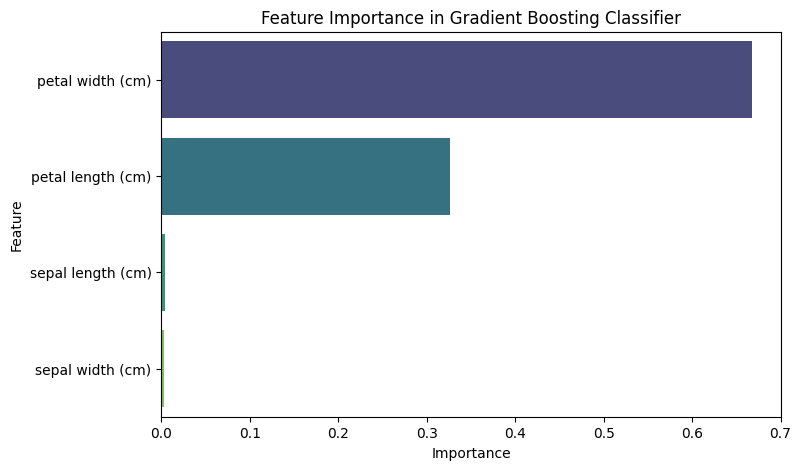

In [1]:
# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# 3️⃣ Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Create Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Optional
    ('gb', GradientBoostingClassifier(random_state=42))
])

# 5️⃣ Hyperparameter Tuning
param_grid = {
    'gb__n_estimators': [100, 200],
    'gb__learning_rate': [0.01, 0.1, 0.2],
    'gb__max_depth': [3, 4, 5],
    'gb__min_samples_split': [2, 5, 10],
    'gb__min_samples_leaf': [1, 2, 4],
    'gb__max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6️⃣ Evaluate Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 7️⃣ Feature Importance Visualization
importances = best_model.named_steps['gb'].feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Feature Importance in Gradient Boosting Classifier")
plt.show()
